In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.datasets import fetch_mldata
from sknn.mlp import Classifier, Layer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
netsecdata=pd.read_csv('./network.csv',sep=',')

x=netsecdata.drop([ 'id','proto', 'state', 'service',  'attack_cat'], axis=1).values
y=netsecdata['label'].values


print(x.shape)
print(y.shape)

(257673, 40)
(257673,)


In [3]:
feature_select_model=ExtraTreesClassifier()
feature_select_model.fit(x,y)
model = SelectFromModel(feature_select_model, prefit=True)
x=model.transform(x)
print(x.shape)

(257673, 6)


In [4]:
number_of_samples=len(y)

random_indices=np.random.permutation(number_of_samples)

num_train=int(number_of_samples*0.7)
num_test=int(number_of_samples*0.30)

x_train=x[random_indices[:num_train]]
y_train=y[random_indices[:num_train]]

x_test=x[random_indices[num_train:]]
y_test=y[random_indices[num_train:]]


x_arr=[]

for xi in x:
    x_arr.append(np.reshape(xi,xi.size))

x=x_arr

In [7]:
model = Classifier(
    layers=[
        Layer("Sigmoid", units=200),
        Layer("Sigmoid", units=150),
        Layer("Rectifier", units=150),
        Layer("Tanh", units=50),
        Layer("Tanh", units=10),
        Layer("Softmax")],
    learning_rate=0.01,
    dropout_rate=0.45,
    verbose=100,
    n_iter=25)

In [8]:
model.fit(x_train,y_train)

Initializing neural network with 6 layers, 6 inputs and 2 outputs.
  - Dense: Sigmoid    Units:  200 
  - Dense: Sigmoid    Units:  150 
  - Dense: Rectifier  Units:  150 
  - Dense: Tanh       Units:  50  
  - Dense: Tanh       Units:  10  
  - Dense: Softmax    Units:  2   

Training on dataset of 180,371 samples with 1,442,968 total size.
  - Using `dropout` for regularization.
  - Terminating loop after 25 total iterations.
  - Early termination after 10 stable iterations.

Epoch       Training Error       Validation Error       Time
------------------------------------------------------------
    1          5.786e-01                 N/A          150.9s
    2          5.358e-01                 N/A          137.9s
    3          5.270e-01                 N/A          150.7s
    4          5.259e-01                 N/A          132.8s
    5          5.258e-01                 N/A          105.0s
    6          5.253e-01                 N/A           98.3s
    7          5.240e-01     

Classifier(batch_size=1, callback=None, debug=False, dropout_rate=0.45,
      f_stable=0.001,
      hidden0=<sknn.nn.Layer `Sigmoid`: name='hidden0', units=200, frozen=False>,
      hidden1=<sknn.nn.Layer `Sigmoid`: name='hidden1', units=150, frozen=False>,
      hidden2=<sknn.nn.Layer `Rectifier`: name='hidden2', units=150, frozen=False>,
      hidden3=<sknn.nn.Layer `Tanh`: name='hidden3', units=50, frozen=False>,
      hidden4=<sknn.nn.Layer `Tanh`: name='hidden4', units=10, frozen=False>,
      layers=[<sknn.nn.Layer `Sigmoid`: name='hidden0', units=200, frozen=False>, <sknn.nn.Layer `Sigmoid`: name='hidden1', units=150, frozen=False>, <sknn.nn.Layer `Rectifier`: name='hidden2', units=150, frozen=False>, <sknn.nn.Layer `Tanh`: name='hidden3', units=50, frozen=False>, <sknn.nn.Layer `Tanh`: name='hidden4', units=10, frozen=False>, <sknn.nn.Layer `Softmax`: name='output', units=2, frozen=False>],
      learning_momentum=0.9, learning_rate=0.01, learning_rule='sgd',
      loss_type=No

In [9]:
predicted=model.predict(x_test)

print(accuracy_score(y_test, predicted)*100)

[(77302, 2)]
85.696359732


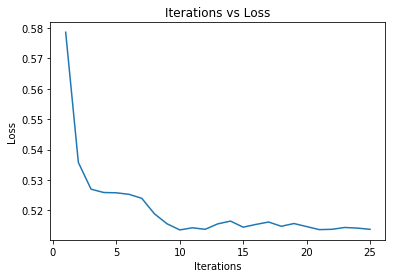

In [10]:
%matplotlib inline

iteration=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
lossval=[5.786e-01, 5.358e-01,5.270e-01, 5.259e-01, 5.258e-01, 5.253e-01,5.240e-01,5.189e-01,5.156e-01,5.136e-01,5.143e-01,5.138e-01 ,5.156e-01,5.165e-01,5.145e-01,5.154e-01,5.162e-01,5.148e-01,5.157e-01,5.147e-01,5.137e-01,5.138e-01 ,5.144e-01, 5.142e-01, 5.138e-01]

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Iterations vs Loss')
plt.plot(iteration,lossval)

In [11]:
confusion=confusion_matrix(y_test,predicted)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

# Accuracy
print('Accuracy:',(TP+TN)/float(TP+TN+FP+FN)*100)

#Misclassification
print('Misclassification:',(FP+FN)/float(TP+TN+FP+FN)*100)

#Sensitivity
print('Sensitivity:',(TP)/float(TP+FN)*100)

#Specificity
print('Specificty:',(TN)/float(TN+FP)*100)

#Flase Positive Rate
print('False Positive:',(FP)/float(TN+FP)*100)

#Precision Score
print('Precision Score:', (TP)/float(TP+FP)*100)

Accuracy: 85.696359732
Misclassification: 14.303640268
Sensitivity: 99.8929271298
Specificty: 60.4215372442
False Positive: 39.5784627558
Precision Score: 81.7965260546


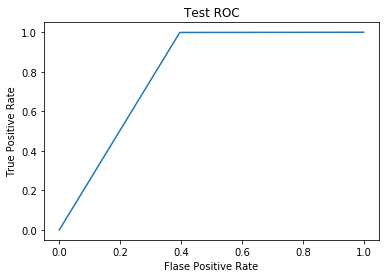

Test AUC: 80.157232187


In [12]:
fpr,tpr,threshold=metrics.roc_curve(y_test,predicted)
plt.plot(fpr,tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC')
plt.show()

print("Test AUC:",metrics.roc_auc_score(y_test,predicted)*100)